In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

from keras.preprocessing import image

%matplotlib inline

Using TensorFlow backend.


In [2]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [147]:
gen = image.ImageDataGenerator(rotation_range=8.0,       # degrees (0 to 180)
                               width_shift_range=0.05,     # fraction of total width
                               height_shift_range=0.05,    # fraction of total height
                               shear_range=0.10,           # shear intensity (shear angle in radians; 2 radians = 360 degrees)
                               zoom_range=0.2,            # amount of zoom
                               channel_shift_range=12.0,   # shift range for each channels
                               horizontal_flip=True, 
                               vertical_flip=False, data_format='channels_last')

In [148]:
# create a batch of a single image
img = np.expand_dims(ndimage.imread('elephant.jpg'),0)
aug_iter = gen.flow(img)

In [149]:
# get 8 examples of the augmented image
aug_images = [ next(aug_iter)[0].astype(np.uint8) for i in range(8) ]

In [150]:
# plt.imshow(img[0])

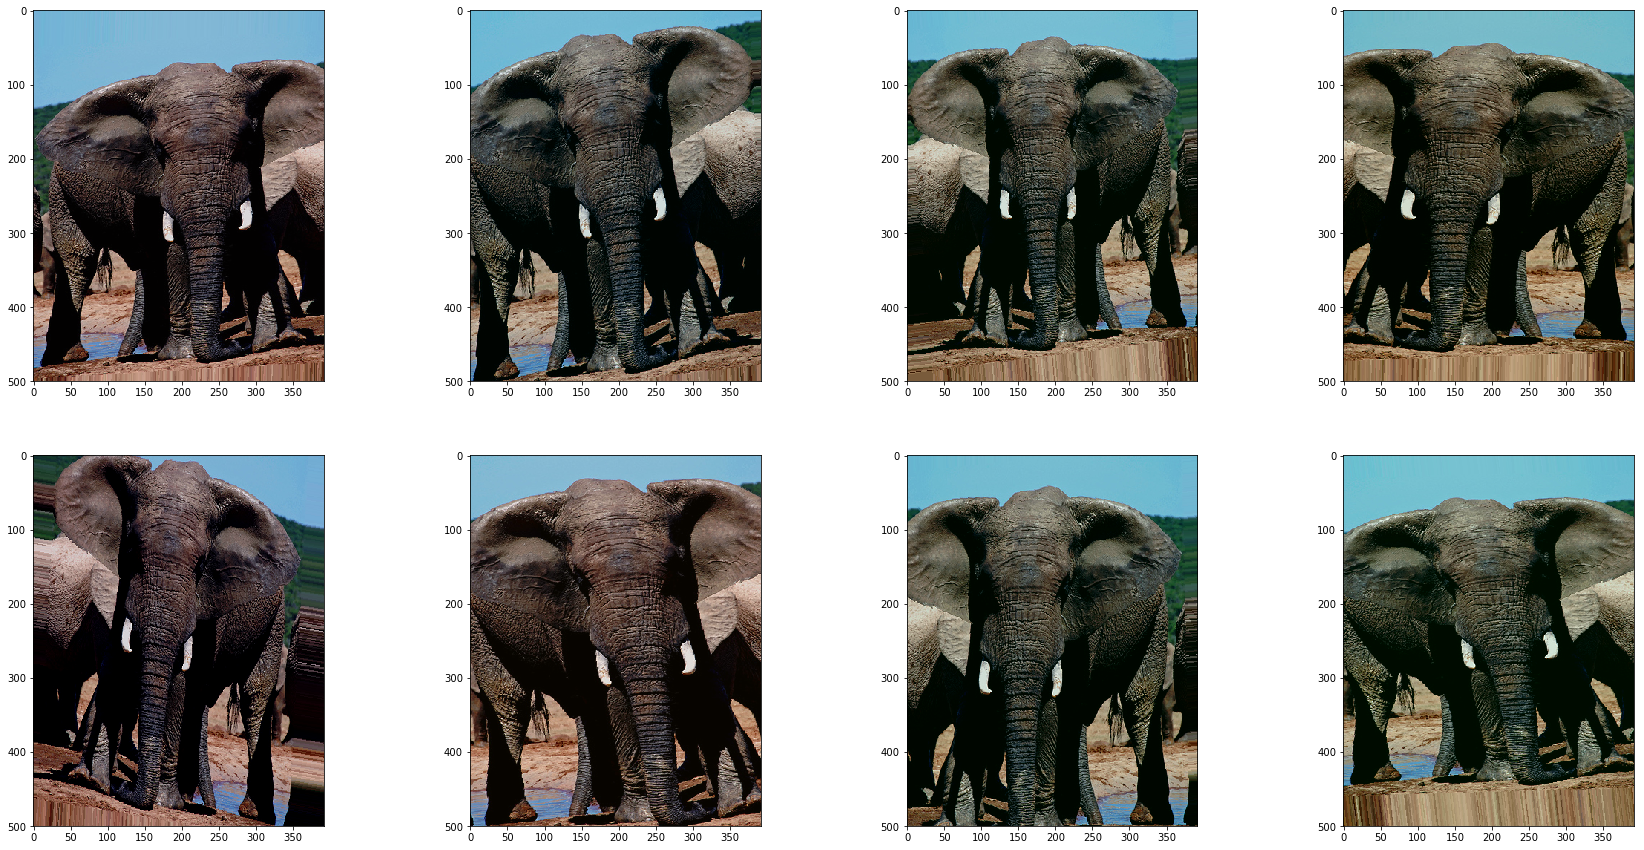

In [151]:
plots(aug_images, (30,15), 2)